In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

sns.set_style()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cirrhosis.csv to cirrhosis.csv


In [ ]:
import io
import pandas as pd
data = pd.read_csv(io.BytesIO(uploaded['cirrhosis.csv']))

In [ ]:
data.head()
data.shape
data.info()
data.describe().T
data.describe(exclude='number').T
round(data.isnull().sum()/len(data),3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

ID               0.000
N_Days           0.000
Status           0.000
Drug             0.254
Age              0.000
Sex              0.000
Ascites          0.254
Hepatomegaly     0.254
Spiders          0.254
Edema            0.000
Bilirubin        0.000
Cholesterol      0.321
Albumin          0.000
Copper           0.258
Alk_Phos         0.254
SGOT             0.254
Tryglicerides    0.325
Platelets        0.026
Prothrombin      0.005
Stage            0.014
dtype: float64

In [ ]:
# Missing Values Filled Using Mode Values
data['Drug'].fillna('D-penicillamine', inplace=True)
data['Ascites'].fillna('N', inplace=True)
data['Hepatomegaly'].fillna('Y', inplace=True)
data['Spiders'].fillna('N', inplace=True)
data['Stage'].fillna(3.0, inplace=True)

# Missing Values Filled Using Median Values
data['Cholesterol'].fillna(309.5, inplace=True)
data['Copper'].fillna(73, inplace=True)
data['Alk_Phos'].fillna(1259, inplace=True)
data['SGOT'].fillna(114.7, inplace=True)
data['Tryglicerides'].fillna(108, inplace=True)
data['Platelets'].fillna(251, inplace=True)
data['Prothrombin'].fillna(10.60, inplace=True)

In [ ]:
# Age is in days so I'll just convert it in years.
data['Age'] = data['Age']/365

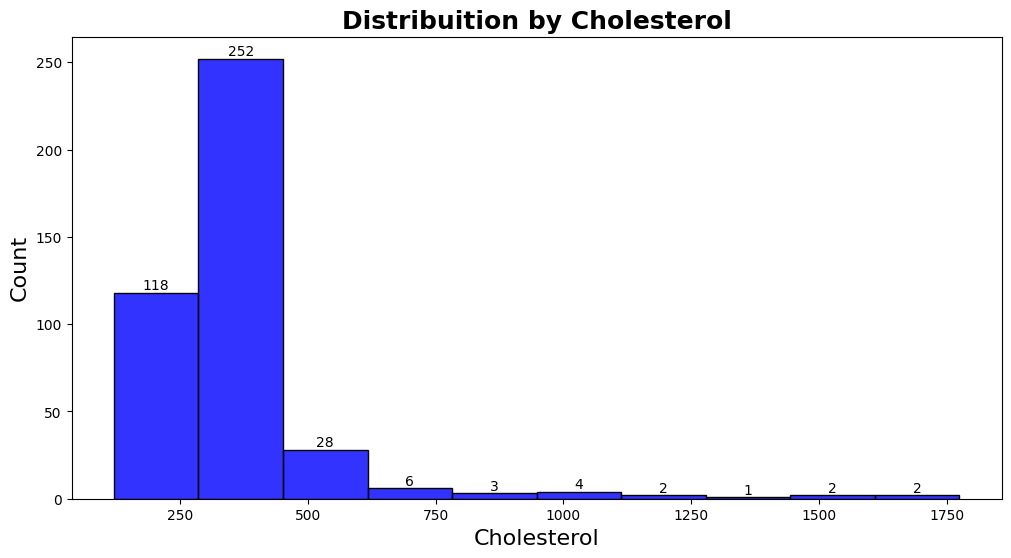

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Cholesterol', fontsize=18, fontweight='bold')
ax = sns.histplot(x=data['Cholesterol'], bins=10,  color='blue', alpha=0.8)
plt.xlabel('Cholesterol', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

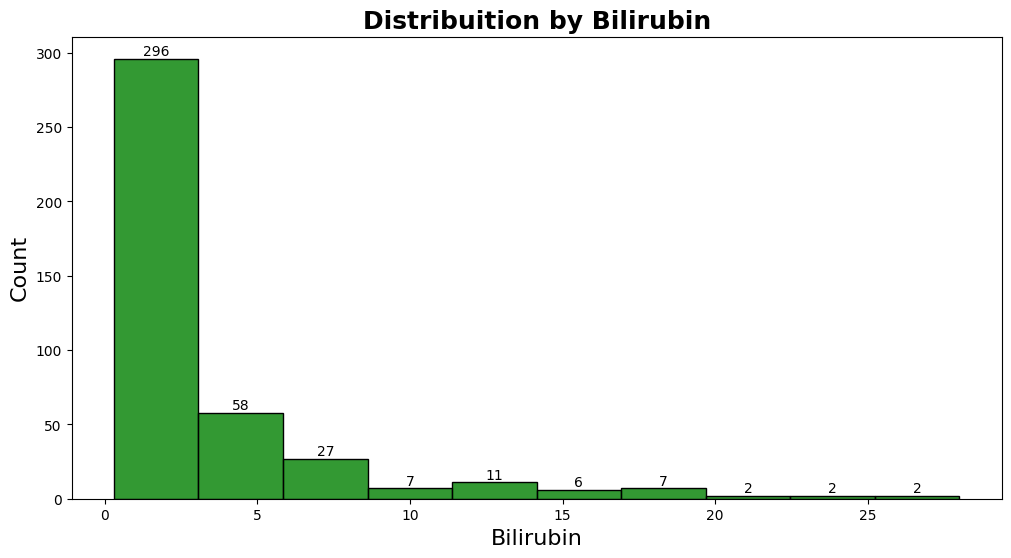

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Bilirubin', fontsize=18, fontweight='bold')
ax = sns.histplot(x=data['Bilirubin'], bins=10,  color='green', alpha=0.8)
plt.xlabel('Bilirubin', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

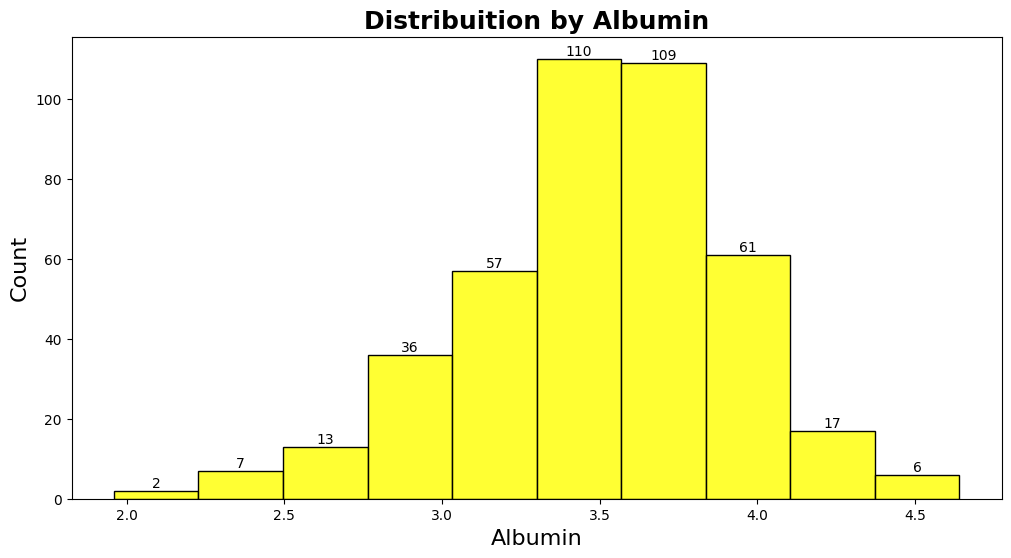

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Albumin', fontsize=18, fontweight='bold')
ax = sns.histplot(x=data['Albumin'], bins=10,  color='yellow', alpha=0.8)
plt.xlabel('Albumin', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

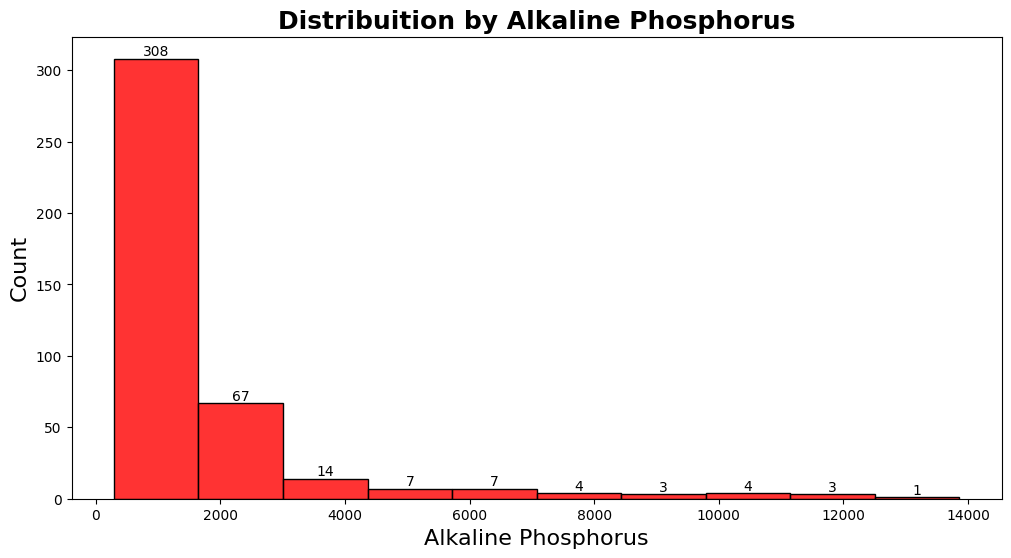

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Alkaline Phosphorus', fontsize=18, fontweight='bold')
ax = sns.histplot(x=data['Alk_Phos'], bins=10,  color='red', alpha=0.8)
plt.xlabel('Alkaline Phosphorus', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

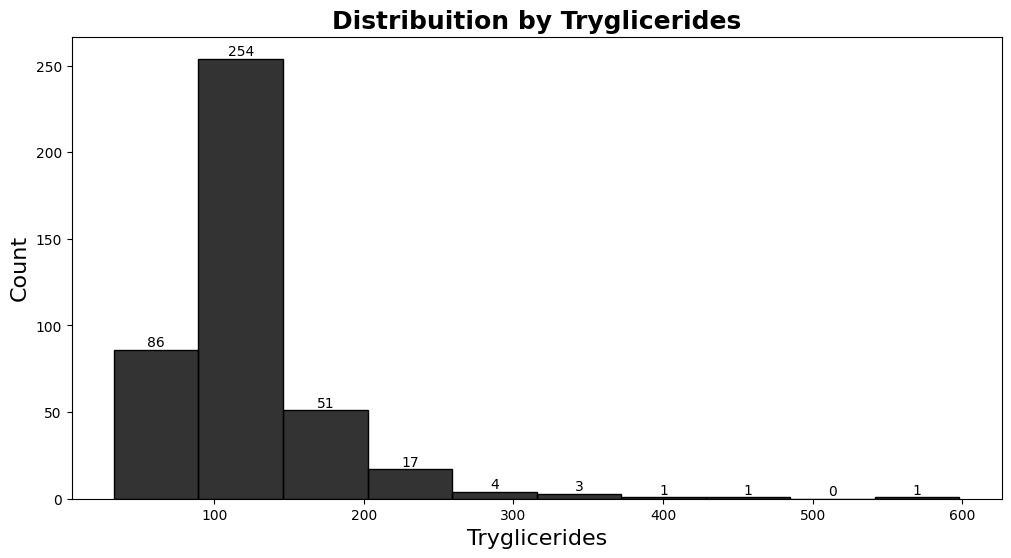

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Tryglicerides', fontsize=18, fontweight='bold')
ax = sns.histplot(x=data['Tryglicerides'], bins=10,  color='black', alpha=0.8)
plt.xlabel('Tryglicerides', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

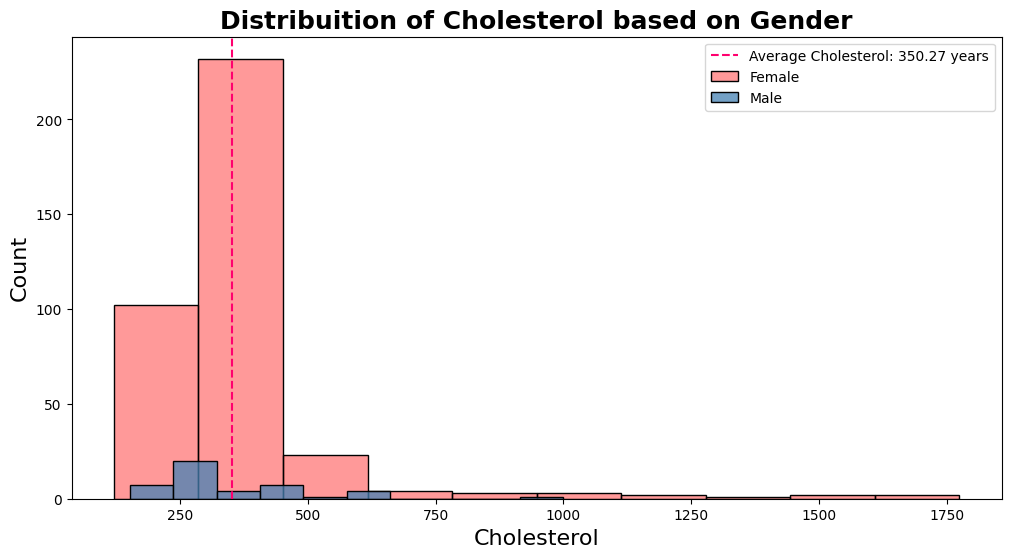

In [ ]:
avg_chol = np.mean(data['Cholesterol'])

plt.figure(figsize=(12,6))
plt.title('Distribuition of Cholesterol based on Gender', fontsize=18, fontweight='bold')
sns.histplot(data[data['Sex'] == 'F']['Cholesterol'], bins=10, label='Female', color='red', alpha=0.4)
sns.histplot(data[data['Sex'] == 'M']['Cholesterol'], bins=10, label='Male', color='steelblue')
plt.axvline(x=avg_chol, color='#ff006e', linestyle='--', label=f'Average Cholesterol: {avg_chol:.2f} years')
plt.xlabel('Cholesterol', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()

In [ ]:
data['Status'].replace({'C':0, 'CL':1, 'D':2}, inplace=True)
data['Drug'].replace({'D-penicillamine':0, 'Placebo':1}, inplace=True)
data['Sex'].replace({'F':0, 'M':1}, inplace=True)
data['Ascites'].replace({'N':0, 'Y':1}, inplace=True)
data['Hepatomegaly'].replace({'N':0, 'Y':1}, inplace=True)
data['Spiders'].replace({'N':0, 'Y':1}, inplace=True)
data['Edema'].replace({'N':0, 'S':1, 'Y':2}, inplace=True)

<Axes: >

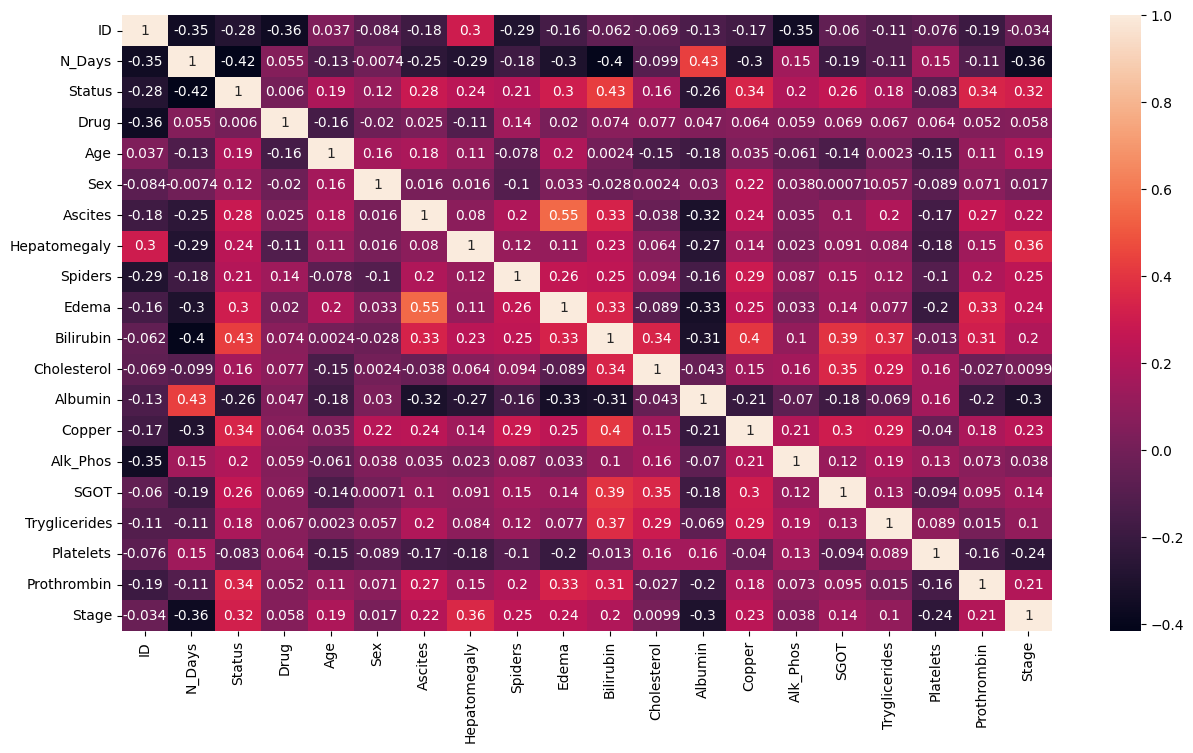

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True)

In [ ]:
X = data.drop(['Status'], axis=1)
y = data['Status']

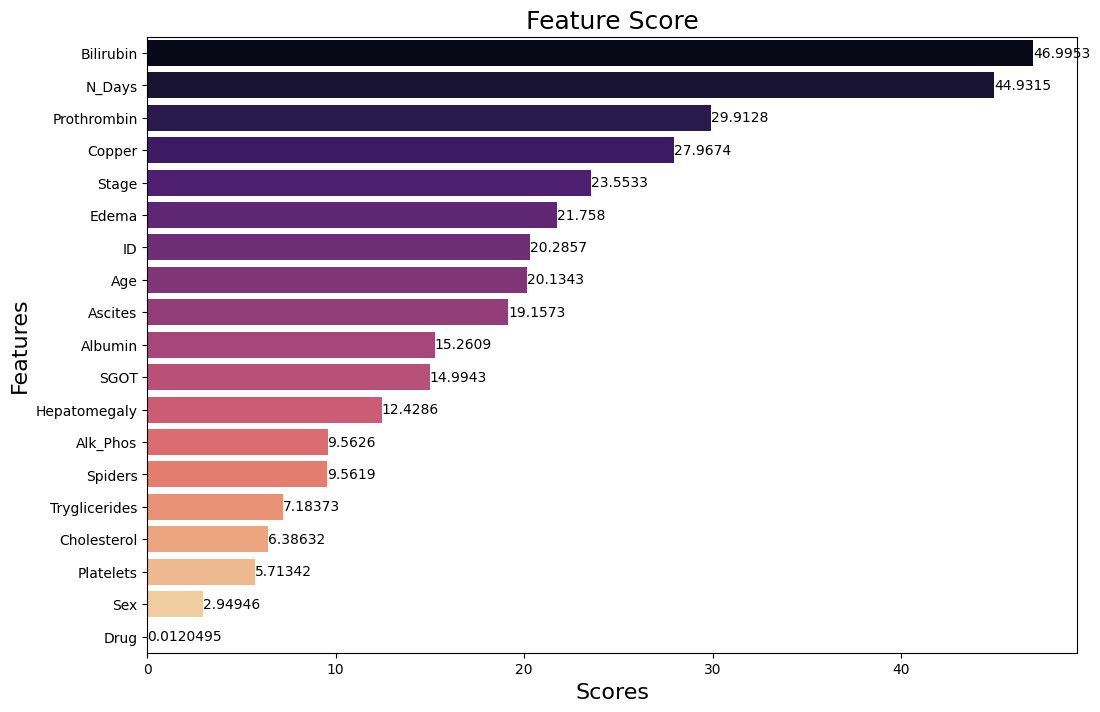

In [ ]:
selector = SelectKBest(f_classif, k=19)
X_selected = selector.fit_transform(X,y)

## Creating list of all the columns and their score in variables
selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]

## Creating a New Dataframe to store features and their scores
feature_score_df = pd.DataFrame({'Features': selected_features, 'Scores': feature_scores})

## Sort the created dataframe in descending order
feature_score_df = feature_score_df.sort_values(by='Scores', ascending=False)

## Plot a barplot to for better understanding of the features and scores
plt.figure(figsize=(12,8))
ax = sns.barplot(x=feature_score_df['Scores'], y=feature_score_df['Features'], palette='magma')
plt.title('Feature Score', fontsize=18)
plt.xlabel('Scores', fontsize=16)
plt.ylabel('Features', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

In [ ]:
X = X.drop(['Sex', 'Drug', 'Platelets', 'Cholesterol', 'Tryglicerides'], axis=1)

In [ ]:
col = X.columns

sc = StandardScaler()

X[col] = sc.fit_transform(X[col])
X.head()

,ID,N_Days,Age,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Copper,Alk_Phos,SGOT,Prothrombin,Stage
0,-1.727912,-1.375612,0.768941,4.051749,0.755929,1.909043,3.553818,2.562152,-2.114296,0.869937,-0.043326,0.354624,1.442407,1.115988
1,-1.719625,2.340341,0.546706,-0.246807,0.755929,1.909043,-0.396969,-0.481759,1.513818,-0.501099,2.987731,-0.143679,-0.128736,-0.027353
2,-1.711337,-0.820938,1.852567,-0.246807,-1.322876,-0.523823,1.578425,-0.413611,-0.041088,1.595779,-0.685119,-0.498998,1.246014,1.115988
3,-1.703050,0.006542,0.383244,-0.246807,0.755929,1.909043,1.578425,-0.322748,-2.255651,-0.366683,2.308028,-1.222487,-0.423325,1.115988
4,-1.694763,-0.375023,-1.210972,-0.246807,0.755929,1.909043,-0.396969,0.040704,0.076708,0.695197,-0.602359,-0.151226,0.165853,-0.027353


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
models = {
    'LogisticRegression': LogisticRegression(),
    'NaiveBayes': GaussianNB(),
    'KNN': KNeighborsClassifier()
}

params = {
    'LogisticRegression': {'C': [0.001, 0.01, 0.1, 1, 10], 'solver': ['liblinear', 'saga']},
    'NaiveBayes': {},  # Naive Bayes typically does not need hyperparameters tuning for basic usage
    'KNN': {'n_neighbors': [3, 5, 7, 9], 'metric': ['euclidean', 'chebyshev', 'manhattan']}
}

In [ ]:
best_estimators = {}

for name, model in models.items():
    grid = GridSearchCV(model, params[name], cv=10, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_estimators[name] = grid.best_estimator_
    print(f"Best parameters for {name}: {grid.best_params_}")
    print(f"Best cross-validated accuracy for {name}: {grid.best_score_:.3f}")


Best parameters for LogisticRegression: {'C': 0.1, 'solver': 'liblinear'}
Best cross-validated accuracy for LogisticRegression: 0.773
Best parameters for NaiveBayes: {}
Best cross-validated accuracy for NaiveBayes: 0.321
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7}
Best cross-validated accuracy for KNN: 0.746


In [ ]:
for name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))


Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.81      0.95      0.88        44
           1       0.00      0.00      0.00         4
           2       0.91      0.81      0.85        36

    accuracy                           0.85        84
   macro avg       0.57      0.59      0.58        84
weighted avg       0.81      0.85      0.82        84

Classification Report for NaiveBayes:
              precision    recall  f1-score   support

           0       1.00      0.16      0.27        44
           1       0.07      1.00      0.13         4
           2       0.79      0.42      0.55        36

    accuracy                           0.31        84
   macro avg       0.62      0.53      0.32        84
weighted avg       0.87      0.31      0.38        84

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.73      0.91      0.81        44
           1  

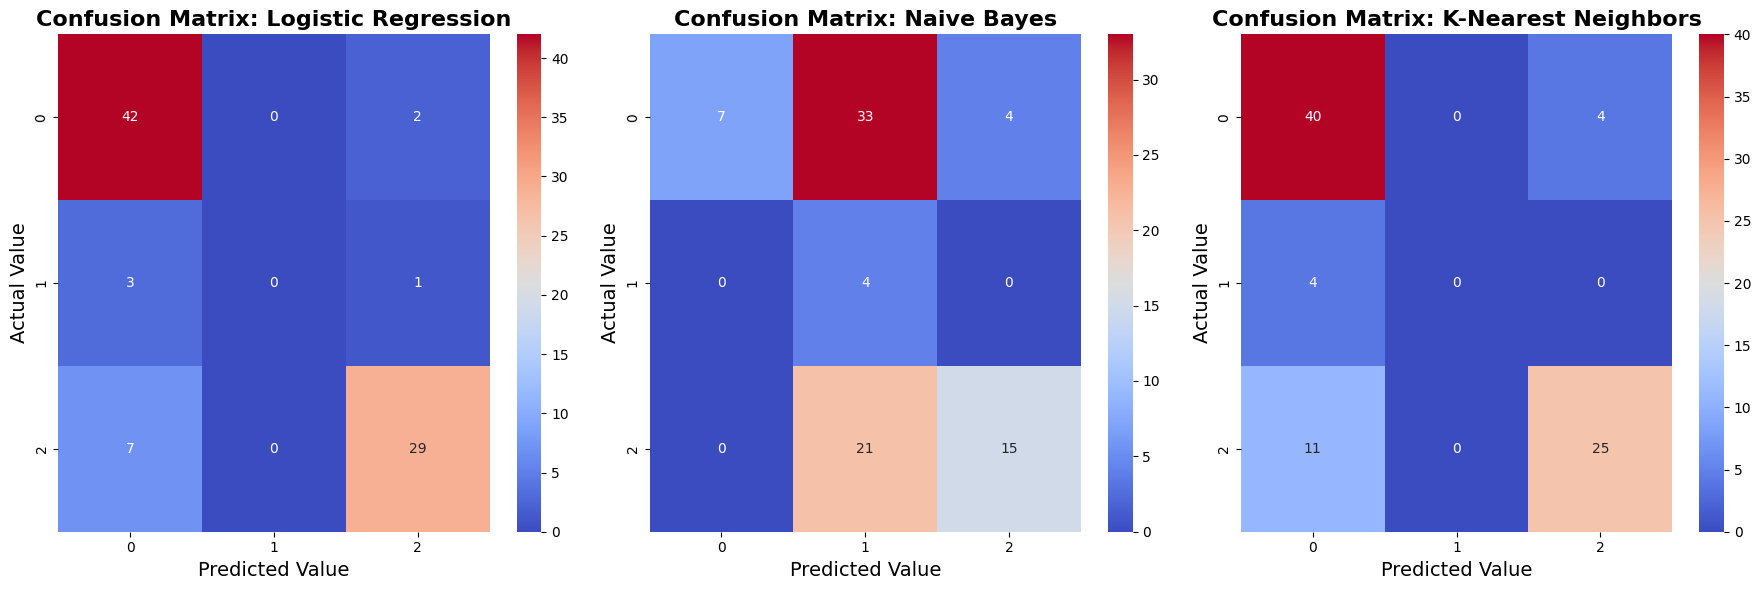

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


y_pred_lr = best_estimators['LogisticRegression'].predict(X_test)  # Logistic Regression predictions
y_pred_nb = best_estimators['NaiveBayes'].predict(X_test)          # Naive Bayes predictions
y_pred_knn = best_estimators['KNN'].predict(X_test)                # K-Nearest Neighbors predictions


# Setup the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Titles for each subplot
titles = ['Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbors']

# Predictions list
predictions = [y_pred_lr, y_pred_nb, y_pred_knn]

# Loop through all classifiers
for i, (pred, title) in enumerate(zip(predictions, titles)):
    # Plotting each confusion matrix
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g', cmap='coolwarm', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix: {title}', fontsize=16, fontweight='bold')
    axes[i].set_xlabel('Predicted Value', fontsize=14)
    axes[i].set_ylabel('Actual Value', fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from numpy import interp
from itertools import cycle
# Binarize the output if you have more than two classes
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

# Split the data again if not already defined as binarized
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=42)
# Defining a general function to fit model
def fit_model(model, X_train, y_train_bin):
    if n_classes > 2:
        model = OneVsRestClassifier(model)
    model.fit(X_train, y_train_bin)
    return model

# Fit models
model_lr = fit_model(LogisticRegression(solver='liblinear'), X_train, y_train_bin)
model_nb = fit_model(GaussianNB(), X_train, y_train_bin)
model_knn = fit_model(KNeighborsClassifier(n_neighbors=3), X_train, y_train_bin)


In [ ]:
# Function to calculate ROC AUC
def compute_roc_auc(model, X_test, y_test_bin):
    if n_classes == 2:
        y_score = model.decision_function(X_test)
    else:
        y_score = model.predict_proba(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    return fpr, tpr, roc_auc

fpr_lr, tpr_lr, roc_auc_lr = compute_roc_auc(model_lr, X_test, y_test_bin)
fpr_nb, tpr_nb, roc_auc_nb = compute_roc_auc(model_nb, X_test, y_test_bin)
fpr_knn, tpr_knn, roc_auc_knn = compute_roc_auc(model_knn, X_test, y_test_bin)


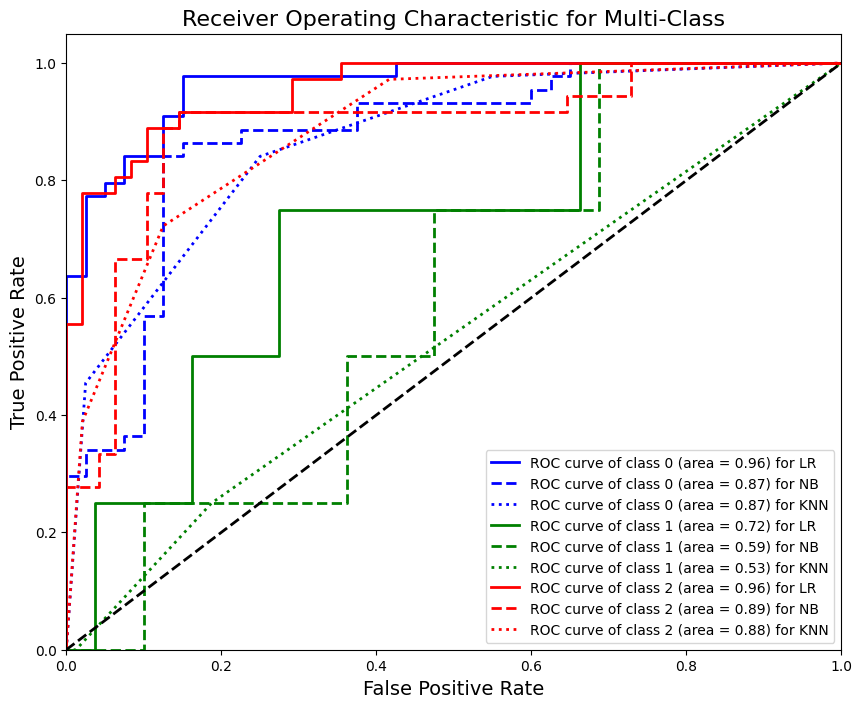

In [ ]:
# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'green', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_lr[i], tpr_lr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc_lr[i]:.2f}) for LR')
    plt.plot(fpr_nb[i], tpr_nb[i], color=color, lw=2, linestyle='--',
             label=f'ROC curve of class {i} (area = {roc_auc_nb[i]:.2f}) for NB')
    plt.plot(fpr_knn[i], tpr_knn[i], color=color, lw=2, linestyle=':',
             label=f'ROC curve of class {i} (area = {roc_auc_knn[i]:.2f}) for KNN')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic for Multi-Class', fontsize=16)
plt.legend(loc="lower right")
plt.show()
